In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 01 Load Data

In [2]:
# Load the data
train_dta = pd.read_csv('../../data/breast_cancer/breast_cancer_data_train.csv')
test_dta = pd.read_csv('../../data/breast_cancer/breast_cancer_data_test.csv')
train_dta.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,0
1,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,1
2,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,0
3,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,0
4,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,0


In [3]:
train_dta.shape

(455, 32)

In [4]:
# splitting the data into features and target
X_train = train_dta.drop(['diagnosis'], axis=1)
y_train = train_dta['diagnosis']

X_test = test_dta.drop(['diagnosis'], axis=1)
y_test = test_dta['diagnosis']


# Scaling

Standard Scaler

This method transforms values to follow a standard normal distribution with a mean of 0 and a standard deviation of 1.
z = x - mean / standard deviation

In [5]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
#removing nan values and infinetes
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)

### Modeling
- Using Grid search cv to find and fitthe best model

In [ ]:
# Implementing a grid search cv to find the best parameters and the model between random forest, decision tree,sgb, random forest and svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# defining parameters grids for each model
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 10, 20, 30]
    },
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 6, 9]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9]
    }
]

#create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('model', RandomForestClassifier())
])

# Implementing the grid search
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

# Getting the best model
best_model = grid.best_estimator_
print(grid.best_params_)

# Getting the accuracy of the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# predicting the test data
y_pred = best_model.predict(X_test)






{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'model__max_depth': 3, 'model__n_estimators': 100}
Accuracy: 0.956140350877193


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 760, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self

In [12]:
print(y_pred)

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]


In [16]:
#creating a csv file for the best model's prediction as traditional.csv
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('results/traditional.csv', index=False)

In [17]:
# Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model is:", accuracy)

# Checking the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:", conf_matrix)

Accuracy of the best model is: 0.956140350877193
Confusion matrix is: [[69  2]
 [ 3 40]]


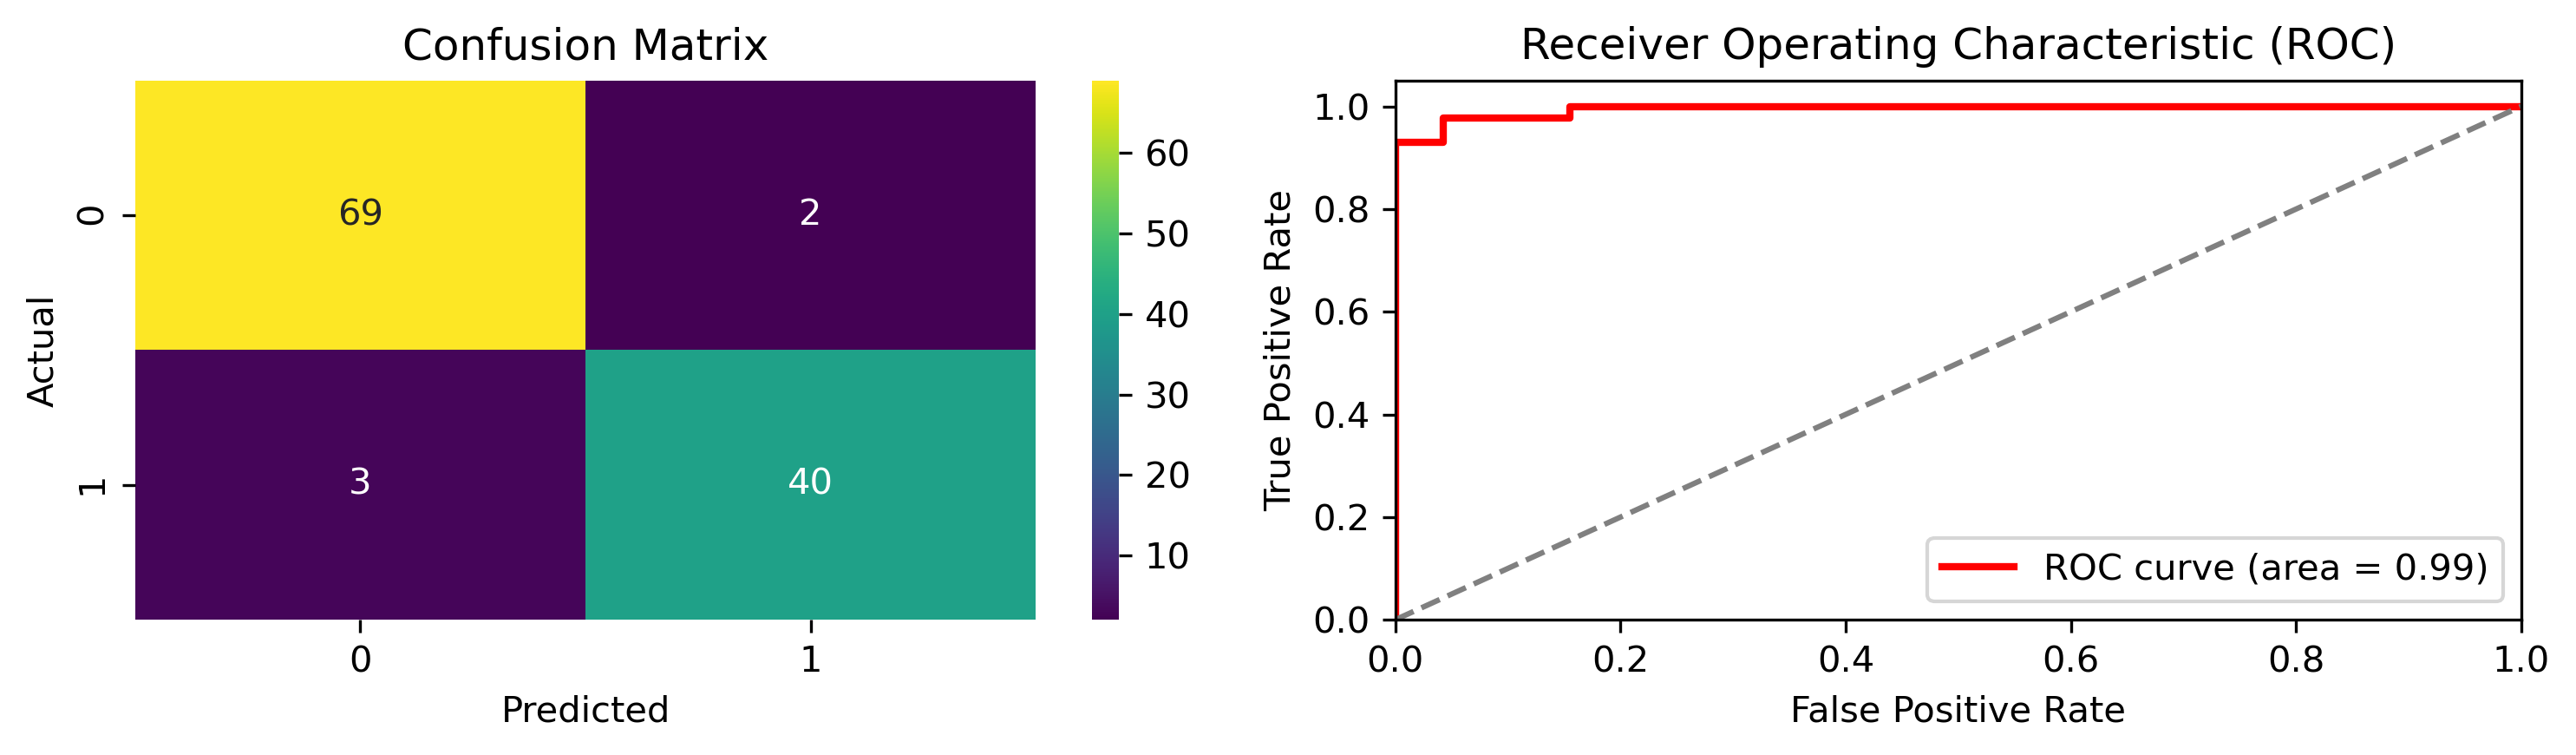

In [18]:
from sklearn.metrics import   roc_auc_score, roc_curve

# Predict probabilities and compute ROC-AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()